# [Reference](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)

# Create Dataset
# Create Model

In [14]:
import pandas as pd

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.vis_utils import plot_model

model = Sequential()

hidden_layer1 = Dense(500, input_dim=2, activation='relu')  # relu = Rectified Linear Unit
model.add(hidden_layer1)

output_layer = Dense(1, activation='sigmoid')
model.add(output_layer)


model.compile(loss='binary_crossentropy', optimizer='adam')

# Train Test Split

In [15]:
n_train = 30
train_x, test_x = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# Train Model

Epoch 1/2000
1/1 [==============================] - 1s 580ms/step - loss: 0.6659 - val_loss: 0.6645

Epoch 00001: val_loss improved from inf to 0.66453, saving model to best_model.h5
Epoch 2/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.6499 - val_loss: 0.6546

Epoch 00002: val_loss improved from 0.66453 to 0.65456, saving model to best_model.h5
Epoch 3/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.6343 - val_loss: 0.6449

Epoch 00003: val_loss improved from 0.65456 to 0.64494, saving model to best_model.h5
Epoch 4/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.6192 - val_loss: 0.6357

Epoch 00004: val_loss improved from 0.64494 to 0.63566, saving model to best_model.h5
Epoch 5/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.6046 - val_loss: 0.6267

Epoch 00005: val_loss improved from 0.63566 to 0.62674, saving model to best_model.h5
Epoch 6/2000
1/1 [==============================] - 0s 43ms/step - loss: 

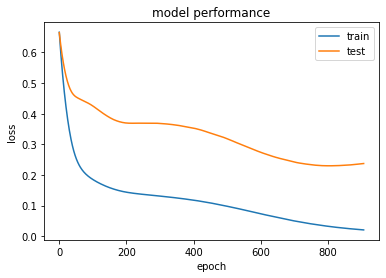

In [16]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pickle as pkl

# es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=2000, callbacks=[es, mc])

model_json = model.to_json()
f = open('model.json', 'w')
f.write(model_json)
f.close()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Load Model
# [Reference for loading model](https://machinelearningmastery.com/save-load-keras-deep-learning-models/)

In [17]:
import pickle as pkl
from keras.models import model_from_json

f = open('model.json', 'r')
json_model = f.read()

model = model_from_json(json_model)
model.compile(loss='binary_crossentropy', optimizer='adam')

model.load_weights('best_model.h5')

model.evaluate(test_x, test_y)

3/3 [==============================] - 0s 4ms/step - loss: 0.2081


0.22988303005695343